In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

(768, 1024)


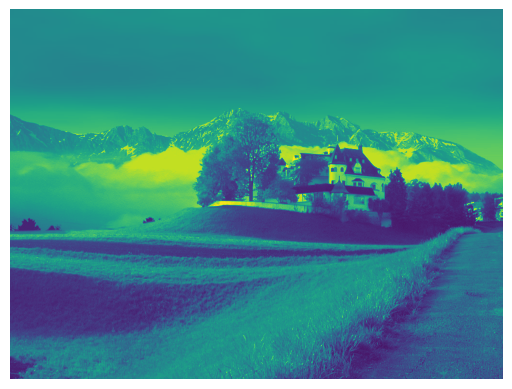

In [4]:
I = cv2.imread("sample4.jpg", 0)
plt.imshow(I);plt.axis("off")
print(I.shape)

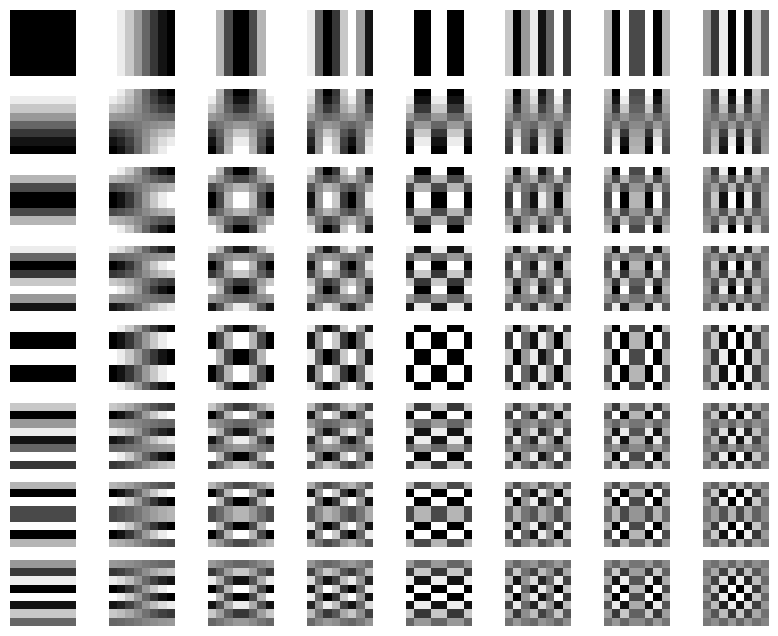

In [5]:
test = np.zeros((8, 8, 8, 8))
for u in range(8):
    for v in range(8):
        for x in range(8):
            for y in range(8):
                test[u, v, x, y] = np.cos(((2*x+1)*u*np.pi)/16) * np.cos(((2*y+1)*v*np.pi)/16)
fig, axes = plt.subplots(8, 8,figsize=(10, 8))
for u in range(8):
    for v in range(8):
        axes[u, v].imshow(test[u, v], cmap="gray")
        axes[u, v].axis("off")
plt.show()

In [25]:
I[...]

array([[121, 121, 121, ..., 116, 116, 116],
       [121, 121, 121, ..., 117, 117, 117],
       [121, 121, 121, ..., 117, 117, 117],
       ...,
       [ 22,  26,  25, ...,  63,  67,  41],
       [ 16,  19,  19, ...,  56,  72,  60],
       [ 22,  21,  18, ...,  59,  34,  79]], dtype=uint8)

In [6]:
def QQC(degree):
    newQ = np.zeros((8, 8), dtype=np.uint8)
    if 1 < degree < 50 : 
        for i in range(8):
            for j in range(8):
                newQ[i, j] = np.clip((50/degree) * Q[i, j], 0, 255)
        return newQ
    elif 50 < degree < 100:
        for i in range(8):
            for j in range(8):
                newQ[i, j] = np.clip(((100 - degree)/50)*Q[i, j], 0, 255)
        return newQ
    elif degree == 50:return Q
    else :return "sorry but not possible"
Q = np.array([  [16, 11, 10, 16, 24, 40, 51, 61],
                [12, 12, 14, 19, 26, 58, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [18, 22, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]])
print(QQC(90))
print(QQC(50))
print(QQC(10))

[[ 3  2  2  3  4  8 10 12]
 [ 2  2  2  3  5 11 12 11]
 [ 2  2  3  4  8 11 13 11]
 [ 2  3  4  5 10 17 16 12]
 [ 3  4  7 11 13 21 20 15]
 [ 4  7 11 12 16 20 22 18]
 [ 9 12 15 17 20 24 24 20]
 [14 18 19 19 22 20 20 19]]
[[ 16  11  10  16  24  40  51  61]
 [ 12  12  14  19  26  58  60  55]
 [ 14  13  16  24  40  57  69  56]
 [ 14  17  22  29  51  87  80  62]
 [ 18  22  37  56  68 109 103  77]
 [ 24  35  55  64  81 104 113  92]
 [ 49  64  78  87 103 121 120 101]
 [ 72  92  95  98 112 100 103  99]]
[[ 80  55  50  80 120 200 255 255]
 [ 60  60  70  95 130 255 255 255]
 [ 70  65  80 120 200 255 255 255]
 [ 70  85 110 145 255 255 255 255]
 [ 90 110 185 255 255 255 255 255]
 [120 175 255 255 255 255 255 255]
 [245 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]]


In [34]:
num_blocks = (I.shape[0]//8, I.shape[1]//8)
blocks = np.empty((num_blocks[0], num_blocks[1], 8, 8))
for i, k in zip(range(0, num_blocks[0]), range(0, I.shape[0], 8)):
    for j, l in zip(range(0, num_blocks[1]), range(0, I.shape[1], 8)):
        blocks[i, j] = I[k:k+8, l:l+8]
blocks.shape

(96, 128, 8, 8)

In [35]:
blocks[95, 127] 


array([[ 71., 118.,  92.,  64.,  47.,  73.,  61.,  36.],
       [ 50., 185., 110.,  69.,  26.,  85.,  90.,  64.],
       [ 64., 113.,  87.,  43.,  61.,  77.,  93.,  72.],
       [ 80.,  88.,  68.,  62.,  67., 113.,  75.,  46.],
       [128.,  99.,  62.,  55.,  94.,  66.,  64.,  39.],
       [ 84.,  96.,  65.,  60.,  54.,  63.,  67.,  41.],
       [ 36.,  51., 120.,  61.,  76.,  56.,  72.,  60.],
       [ 66.,  65.,  93.,  54.,  72.,  59.,  34.,  79.]])

In [36]:
width, hieght, _, _ = blocks.shape
test2 = np.zeros_like(blocks)
g_x = blocks - 128
for row in range(width):
  for column in range(hieght):
    for u in range(8):
        au = 1
        if u == 0: au = (1/np.sqrt(2))
        for v in range(8):
          sumGx = 0
          av = 1
          if v == 0: av = (1/np.sqrt(2))
          for x in range(8):
              for y in range(8):
                sumGx = sumGx + g_x[row, column, x, y] * np.cos(((2 * x + 1) * u * np.pi) / 16) * np.cos(((2 * y + 1) * v * np.pi) / 16)
          test2[row, column, u, v] = (1/4) * au * av * sumGx

In [37]:
for i in range(width):
    for j in range(hieght):
        print(test2[i, j, 0, 1])

-9.734573243839405e-15
-4.553268130182947e-15
-4.553268130182947e-15
-3.3486104061286124
-2.51214793389404e-15
-2.51214793389404e-15
-1.88411095042053e-15
-1.88411095042053e-15
-4.710277376051325e-16
-1.7271017045521523e-15
-1.0990647210786423e-15
-1.3345785898812087e-15
-1.3345785898812087e-15
-3.9252311467094373e-16
-2.7307688711509543
-1.6857488665431646
3.925231146709437e-17
-2.237024459517996
-2.730768871150952
-3.84760521519428
2.4336433109598513e-15
2.2766340650914737e-15
2.2766340650914737e-15
2.2766340650914737e-15
1.4915878357495861e-15
2.747661802696606e-16
2.747661802696606e-16
2.747661802696606e-16
2.747661802696606e-16
2.747661802696606e-16
2.747661802696606e-16
2.747661802696606e-16
2.747661802696606e-16
2.3551386880256624e-16
2.3551386880256624e-16
2.747661802696606e-16
1.4915878357495861e-15
2.2766340650914737e-15
-1.777767470295406
4.710277376051325e-16
2.51214793389404e-15
2.51214793389404e-15
4.553268130182947e-15
4.553268130182947e-15
4.553268130182947e-15
4.553268

In [38]:
width, hieght , _, _= test2.shape
Q1 = QQC(50)
final = np.zeros_like(test2)
for i in range(width):
    for j in range(hieght):
        for x in range(8):
            for y in range(8):
                final[i, j, x, y] = round(test2[i, j, x, y]/Q1[x, y])

In [39]:
final

array([[[[ -3.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         ...,
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.]],

        [[ -3.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         ...,
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.]],

        [[ -3.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         ...,
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.]],

        ...,

  

In [43]:
for i in range(width):
    for j in range(hieght):
        print(final[i, j, 0, 0])

-3.0
-3.0
-3.0
-3.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-1.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
2.0
2.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0
2.0
2.0
2.0
1.0
1.0
1.0
0.0
0.0
0.0
-1.0
-2.0
-2.0
-3.0
-3.0
-3.0
-3.0
-4.0
-4.0
-4.0
-4.0
-5.0
-5.0
-5.0
-5.0
-5.0
-6.0
-6.0
-6.0
-6.0
-6.0
-6.0
-6.0
-6.0
-6.0
-5.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-2.0
-1.0
-1.0
-1.0
-1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
-1.0
-1.0
-2.0
-2.0
-3.0


In [41]:
def zigzag(mat):
    li = []
    index_order = sorted(((x,y) for x in range(8) for y in range(8)),key=lambda x: (x[0]+x[1], -x[1] if (x[0]+x[1]) % 2 else x[1]))
    for i, j in index_order:
        li.append(mat[i, j])
    return np.array(li)

In [42]:
zigzag(final)

array([[[-3.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[-3.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[-3.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[-2.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.

In [15]:
x_y = [[x, y] for x in range(8) for y in range(8)]
print(x_y)

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [6, 0], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7], [7, 0], [7, 1], [7, 2], [7, 3], [7, 4], [7, 5], [7, 6], [7, 7]]
